<a href="https://colab.research.google.com/github/GabrielBonaf/AnaliseDesempenho_Alunos/blob/main/case_olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE - OLIST
Analise de E-commerce

In [5]:
# Importando Bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [6]:
# Importando as bases de dados
clientes = pd.read_csv('/content/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')
produtos = pd.read_csv('/content/olist_products_dataset.csv')
vendedores = pd.read_csv('/content/olist_sellers_dataset.csv')
pdt_category = pd.read_csv('/content/product_category_name_translation.csv')

In [7]:
# Descobrindo quantos vendedores há em São paulo
vendedores.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
# checando se há valores nulos

In [9]:
vendedores.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [10]:
vendedores.query('seller_state == "SP" ')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
...,...,...,...,...
3087,f00f5b35d0abcacbdd863672f4bb2c1a,1238,sao paulo,SP
3088,7bac63f6603d382cc8d0832eb6c100a8,5713,sao paulo,SP
3089,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP


In [11]:
vendedores_SP = vendedores.query('seller_state == "SP" ')
pd.DataFrame(vendedores_SP)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
...,...,...,...,...
3087,f00f5b35d0abcacbdd863672f4bb2c1a,1238,sao paulo,SP
3088,7bac63f6603d382cc8d0832eb6c100a8,5713,sao paulo,SP
3089,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP


## Primeira Pergunta:
Há 1,849 Vendedores no estado de São Paulo

### Descobrindo a quantidade de compradores no estado de São Paulo

In [12]:
# checando base de dados
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [13]:
# checando valores nulos
clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
Clientes_SP = ['SP']

In [15]:
clientes.query('@Clientes_SP in customer_state')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP


In [16]:
df = clientes.query('@Clientes_SP in customer_state')

In [17]:
dados_cliente = df['customer_id'].unique()
pd.DataFrame(dados_cliente)

,0
0,06b8999e2fba1a1fbc88172c00ba8bc7
1,18955e83d337fd6b2def6b18a428ac77
2,4e7b3e00288586ebd08712fdd0374a03
3,b2b6027bc5c5109e529d4dc6358b12c3
4,4f2d8ab171c80ec8364f7c12e35b23ad
...,...
41741,f255d679c7c86c24ef4861320d5b7675
41742,f5a0b560f9e9427792a88bec97710212
41743,17ddf5dd5d51696bb3d7c6291687be6f
41744,e7b71a9017aa05c9a7fd292d714858e8


### Pergunta 2:
Há 41.746 Compradores em São Paulo

### Analise de Quantidade de vendas para o estado de São Paulo em 2017

In [18]:
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
# Juntando a tabela de pedidos e clientes
pedidos3 = pd.merge(orders, clientes, on= 'customer_id', how ='left')
pedidos2 = pd.merge(pedidos3, order_items, on = 'order_id', how = 'left')
pedidos_clientes = pd.merge(pedidos2, produtos, on = 'product_id', how= 'left')


pedidos_clientes.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [24]:
pedidos_clientes.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [25]:

pedidos_clientes['order_date'] = pd.to_datetime(pedidos_clientes['order_purchase_timestamp'])
pedidos_clientes['delivery_time'] = pd.to_datetime(pedidos_clientes['order_delivered_customer_date'])
pedidos_clientes['expected_delivery_time'] = pd.to_datetime(pedidos_clientes['order_estimated_delivery_date'])
pedidos_clientes

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_date,delivery_time,expected_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15


In [26]:
pedidos_clientes["ano_venda"] = pedidos_clientes["order_date"].dt.year

In [27]:
agrupamento_ano = pedidos_clientes.loc[(pedidos_clientes["ano_venda"] == 2017)]

In [28]:
pd.DataFrame(agrupamento_ano)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_date,delivery_time,expected_delivery_time,ano_venda
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2017
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,468.0,3.0,450.0,30.0,10.0,20.0,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,2017
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,86320,...,608.0,1.0,7150.0,65.0,10.0,65.0,2017-07-09 21:57:05,2017-07-26 10:57:55,2017-08-01,2017
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,98900,...,NaN,NaN,600.0,35.0,35.0,15.0,2017-04-11 12:22:08,NaT,2017-05-09,2017
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,932afa1e708222e5821dac9cd5db4cae,26525,...,956.0,1.0,50.0,16.0,16.0,17.0,2017-05-16 13:10:30,2017-05-26 12:55:51,2017-06-07,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113416,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,c716cf2b5b86fb24257cffe9e7969df8,78048,...,180.0,3.0,750.0,26.0,15.0,26.0,2017-10-04 19:57:37,2017-10-20 20:25:45,2017-11-07,2017
113417,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00,e03dbdf5e56c96b106d8115ac336f47f,35502,...,657.0,1.0,750.0,38.0,12.0,25.0,2017-01-27 00:30:03,2017-02-07 13:15:25,2017-03-17,2017
113418,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,831ce3f1bacbd424fc4e38fbd4d66d29,5127,...,254.0,2.0,2500.0,49.0,13.0,41.0,2017-02-23 09:05:12,2017-03-06 11:08:08,2017-03-22,2017
113419,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,1517.0,1.0,1175.0,22.0,13.0,18.0,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,2017


In [29]:
compras_sp = agrupamento_ano.loc[(agrupamento_ano["customer_state"] == "SP")]

In [30]:
compras_sp['customer_state'].unique()

array(['SP'], dtype=object)

In [31]:
compras_sp['ano_venda'].unique()

array([2017])

In [32]:
pd.DataFrame(compras_sp)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_date,delivery_time,expected_delivery_time,ano_venda
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2017
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,18075,...,527.0,1.0,9750.0,42.0,41.0,42.0,2017-07-29 11:55:02,2017-08-16 17:14:30,2017-08-23,2017
12,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,782987b81c92239d922aa49d6bd4200b,4278,...,2574.0,1.0,325.0,21.0,21.0,21.0,2017-07-13 19:58:11,2017-07-19 14:04:48,2017-08-08,2017
19,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11 00:00:00,d0ff1a7468fcc46b8fc658ab35d2a12c,13186,...,125.0,1.0,250.0,40.0,4.0,30.0,2017-11-21 00:03:41,2017-11-27 18:28:00,2017-12-11,2017
21,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,d699688533772c15a061e8ce81cb56df,4001,...,2345.0,6.0,525.0,21.0,16.0,13.0,2017-09-18 14:31:30,2017-10-09 22:23:46,2017-09-28,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113401,1b4a0e6b19d0034b531655b41ea89623,ce5efd1b1d8a2fa290a871edd5c26cd6,delivered,2017-10-02 08:45:35,2017-10-02 08:56:53,2017-10-03 20:26:19,2017-10-06 16:58:25,2017-10-24 00:00:00,39fff7cb5873a7116b02234bd1e6c6dc,11320,...,2231.0,3.0,175.0,21.0,3.0,15.0,2017-10-02 08:45:35,2017-10-06 16:58:25,2017-10-24,2017
113405,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31 00:00:00,a3983b8b6b679c9f645e6ef9517ac98d,14802,...,497.0,4.0,150.0,16.0,7.0,11.0,2017-10-12 20:54:11,2017-11-21 17:06:59,2017-10-31,2017
113411,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,delivered,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17 00:00:00,22757c044f096bef19c36c5d6ffc51d5,1308,...,251.0,1.0,600.0,30.0,30.0,30.0,2017-11-05 16:17:53,2017-11-08 16:08:56,2017-11-17,2017
113418,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,831ce3f1bacbd424fc4e38fbd4d66d29,5127,...,254.0,2.0,2500.0,49.0,13.0,41.0,2017-02-23 09:05:12,2017-03-06 11:08:08,2017-03-22,2017


##  Pergunta 3:
 No ano de 2017 foram realizadas 20.280 vendas para o estado de São Paulo


###  Analise do preço médio das vendas realizadas na cidade de São Paulo

In [47]:
compras_sp.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'order_date', 'expected_delivery_time',
       'ano_venda'],
      dtype='object')

In [193]:
comprasSP = compras_sp[['order_id', 'customer_id', 'product_category_name', 'customer_city','price', 'order_date', 'ano_venda']]

In [194]:
comprasSP.head()

,order_id,customer_id,product_category_name,customer_city,price,order_date,ano_venda
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,utilidades_domesticas,sao paulo,29.99,2017-10-02 10:56:33,2017
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,moveis_escritorio,sorocaba,149.99,2017-07-29 11:55:02,2017
12,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,informatica_acessorios,sao paulo,98.00,2017-07-13 19:58:11,2017
19,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,cama_mesa_banho,hortolandia,17.90,2017-11-21 00:03:41,2017
21,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,beleza_saude,sao paulo,109.90,2017-09-18 14:31:30,2017


In [78]:
media_preco = comprasSP.query('customer_city == "sao paulo"')
media_preco['customer_city'].unique()

array(['sao paulo'], dtype=object)

In [178]:
media_preco.groupby('price').mean()

<ipython-input-178-aee63872cf8b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_preco.groupby('price').mean()


,ano_venda
price,
1.20,2017.0
2.29,2017.0
3.50,2017.0
3.85,2017.0
4.90,2017.0
...,...
1999.99,2017.0
2589.00,2017.0
2600.00,2017.0


In [180]:
media_preco.describe()

,price,ano_venda
count,7278.000000,7366.0
mean,107.485482,2017.0
std,164.338287,0.0
min,1.200000,2017.0
25%,34.990000,2017.0
50%,65.000000,2017.0
75%,119.962500,2017.0
max,3999.900000,2017.0


In [183]:

media_preco['price'].mean().round(2)

107.49

In [184]:
media_preco['price'].median()

65.0

In [185]:
media_preco['price'].mode()

0    59.9
Name: price, dtype: float64

### PERGUNTA 4:
O Preço médio das vendas realizadas em São Paulo em 2017 foi 107.49

## Analise de dias Outliers

In [79]:
media_preco.describe()

,price,ano_venda
count,7278.000000,7366.0
mean,107.485482,2017.0
std,164.338287,0.0
min,1.200000,2017.0
25%,34.990000,2017.0
50%,65.000000,2017.0
75%,119.962500,2017.0
max,3999.900000,2017.0


In [149]:
len(media_preco)

7366

In [169]:
outlier = media_preco.groupby('order_date')['price'].sum()


In [170]:
outlier_dia = pd.DataFrame(outlier)

In [171]:

Q1 = outlier_dia['price'].quantile(.20)
Q3 = outlier_dia['price'].quantile(.80)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR


In [172]:
outliers_index = (outlier_dia['price'] < limite_inferior) | (outlier_dia['price'] > limite_superior)
outliers_index

order_date
2017-01-07 00:34:47    False
2017-01-12 09:45:32    False
2017-01-12 15:05:52     True
2017-01-12 15:58:39     True
2017-01-13 20:12:41    False
                       ...  
2017-12-31 12:28:54     True
2017-12-31 16:23:16    False
2017-12-31 16:56:09    False
2017-12-31 21:10:02    False
2017-12-31 21:17:54    False
Name: price, Length: 6351, dtype: bool

In [173]:
outlier_dia[outliers_index]['price']

order_date
2017-01-12 15:05:52     755.99
2017-01-12 15:58:39     354.80
2017-01-22 14:09:03     636.00
2017-01-22 16:03:50     689.89
2017-01-26 16:29:30    1718.00
                        ...   
2017-12-25 15:59:53     379.00
2017-12-26 10:35:51     441.78
2017-12-27 15:57:31     674.70
2017-12-29 23:05:46     379.00
2017-12-31 12:28:54     899.90
Name: price, Length: 357, dtype: float64

In [174]:
len(outlier_dia[outliers_index]['price'])

357

In [196]:
outlier_dia[outliers_index]['price'].max().round(2)

3999.9

In [177]:
outlier_dia.query('price == 3999.9')

,price
order_date,
2017-03-18 20:08:04,3999.9


In [195]:
comprasSP.query('price == 3999.9')

,order_id,customer_id,product_category_name,customer_city,price,order_date,ano_venda
64979,86c4eab1571921a6a6e248ed312f5a5a,c6695e3b1e48680db36b487419fb0398,relogios_presentes,sao paulo,3999.9,2017-03-18 20:08:04,2017


In [189]:
outlier_dia[outliers_index]['price'].mean().round(2)

687.27

### Pergunta 5:
Sim, existem dias outliers e uma explicação para isso é que o preço medio das vendas é 107.49 reais, entretanto, existem dias outliers com valor medio de 687,27 podendo chegar ao valor de 3999,90 (outlier de valor maximo) no dia 18/03/2017

### Soma de venda por mês em todo periodo para o estado de São Paulo:

In [202]:
vendas_sp1 = pedidos_clientes.loc[(pedidos_clientes["customer_state"] == 'SP')]

In [203]:
vendas_sp1['customer_state'].unique()

array(['SP'], dtype=object)

In [245]:
vendas_sp1["mes_venda"] = pedidos_clientes["order_date"].dt.month

<ipython-input-245-852237ecbe3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_sp1["mes_venda"] = pedidos_clientes["order_date"].dt.month


In [246]:
vendas_sp1.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_date', 'delivery_time', 'expected_delivery_time', 'ano_venda',
       'mes_venda'],
      dtype='object')

In [218]:
vendas_sp = vendas_sp1[['mes_venda', 'ano_venda','price', 'customer_state']]

In [407]:
vendas_sp.head()

,mes_venda,ano_venda,price,customer_state
0,10,2017,29.99,SP
4,2,2018,19.90,SP
9,7,2017,149.99,SP
12,7,2017,98.00,SP
14,7,2018,19.90,SP


In [408]:
sp_vendas = vendas_por_mes.groupby(by=['ano_venda', 'mes_venda'])['price'].sum().reset_index()

In [409]:
pd.DataFrame(sp_vendas)

,ano_venda,mes_venda,price
0,2016,9,134.97
1,2016,10,14575.85
2,2017,1,41534.90
3,2017,2,78687.08
4,2017,3,138087.91
5,2017,4,132634.50
6,2017,5,176912.68
7,2017,6,173887.55
8,2017,7,184714.55
9,2017,8,198753.97


In [419]:
mes_ano = ['set/2016', 'out/2016', 'jan/2017', 'fev/2017', 'mar/2017','abr/2017', 'mai/2017','jun/2017', 'jul/2017', 'ago/2017', 'set/2017', 'out/2017', 'nov/2017', 'dez/2017', 'jan/2018', 'fev/2018', 'mar/2018','abr/2018', 'mai/2018', 'jun/2018', 'jul/2018', 'ago/2018', 'set/2018', 'out/2018']

In [440]:
sp_vendas['mes_ano'] = mes_ano
sp_vendas.rename(columns={'price': 'valor_total'})

,ano_venda,mes_venda,valor_total,mes_ano
0,2016,9,134.97,set/2016
1,2016,10,14575.85,out/2016
2,2017,1,41534.90,jan/2017
3,2017,2,78687.08,fev/2017
4,2017,3,138087.91,mar/2017
5,2017,4,132634.50,abr/2017
6,2017,5,176912.68,mai/2017
7,2017,6,173887.55,jun/2017
8,2017,7,184714.55,jul/2017
9,2017,8,198753.97,ago/2017


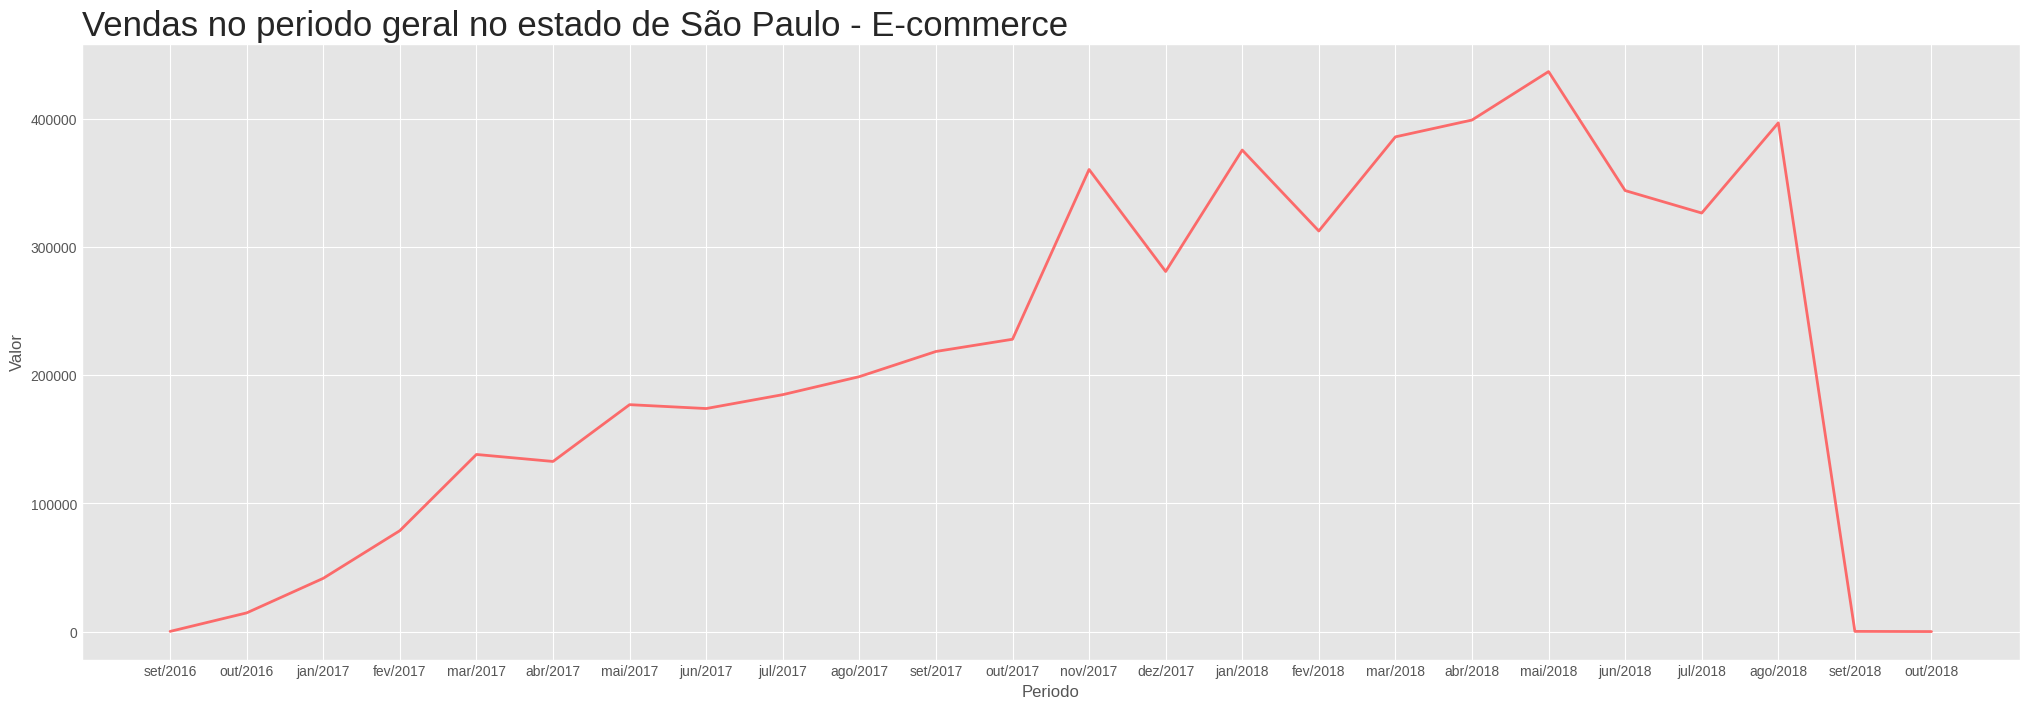

In [447]:
# Graficos:

# Tamanho
plt.figure( figsize=(25, 8) )

# Style
plt.style.use('ggplot')


# Grafico
plt.title( 'Vendas no periodo geral no estado de São Paulo - E-commerce', loc='left', fontsize=25 )
sns.lineplot( data=sp_vendas, x='mes_ano', y='price', estimator='sum', lw=2, color='#ff5555', alpha=0.85 );

# Labels
plt.xlabel('Periodo')
plt.ylabel('Valor');


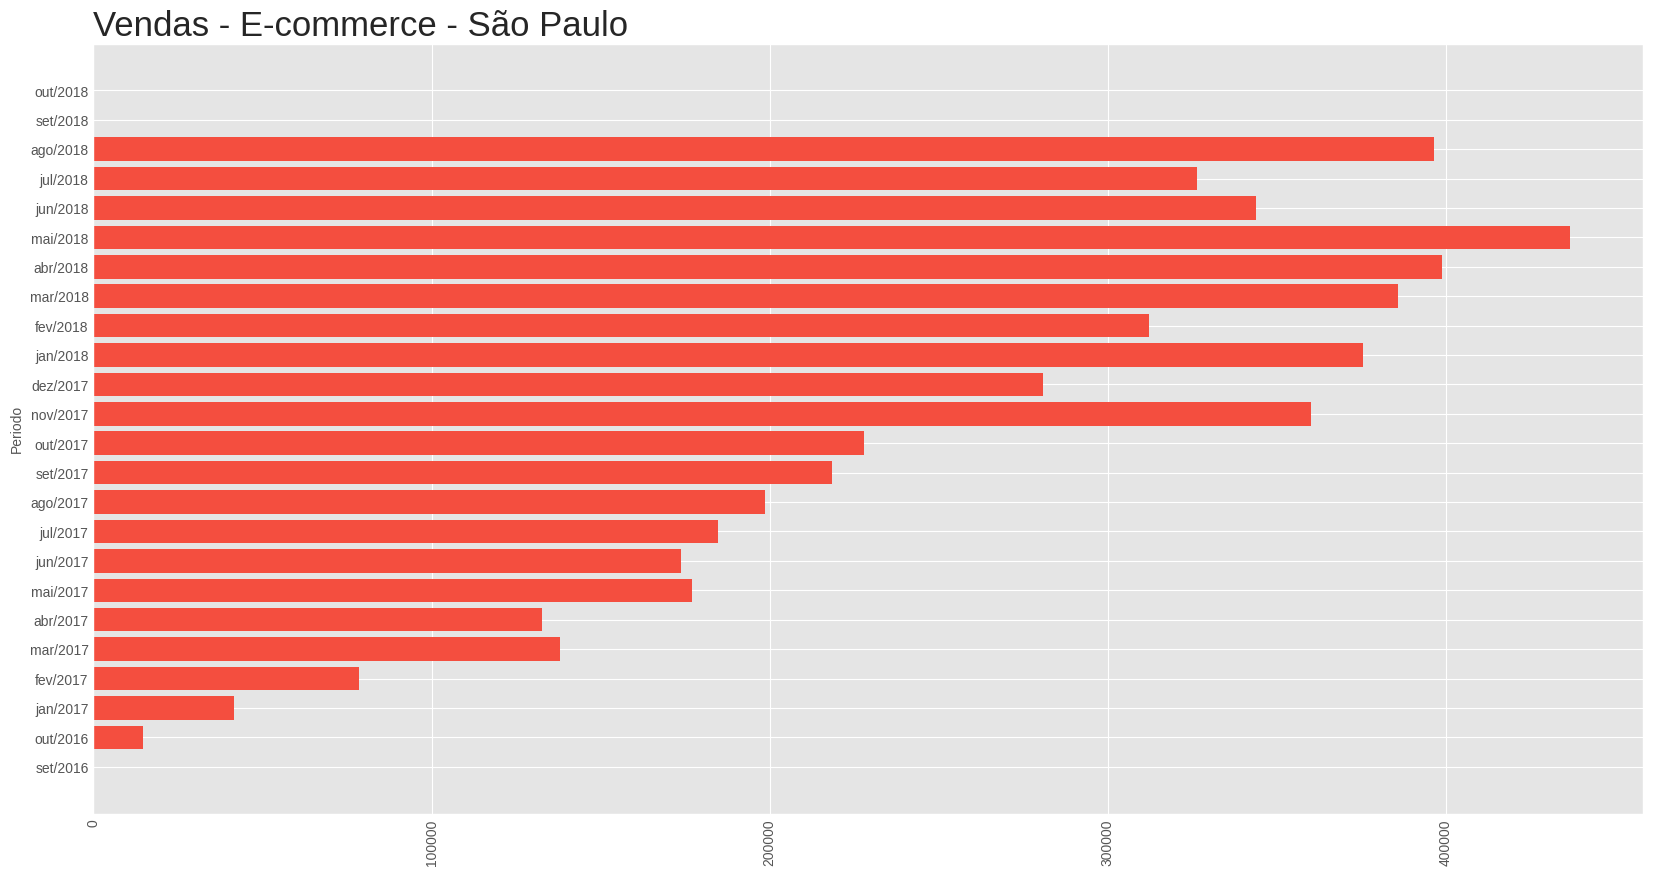

In [434]:
# Tamanho
plt.figure( figsize=(20, 10) )

# Grafico
plt.title( 'Vendas - E-commerce - São Paulo', loc='left', fontsize=25 )

# Grafico
plt.barh( sp_vendas['mes_ano'], sp_vendas['price'], color='#f44e3f' )

# Labels
plt.ylabel('Periodo', fontsize=10)
plt.xticks( rotation=90 );
